In [1]:
import pandas as pd
from metrics import indicators, forecast
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
def add_indicators(data: pd.DataFrame) -> pd.DataFrame:
    timestamp = indicators.timestamp(data)
    timevalues = data.drop(["Datetime", "Dividends", "Stock Splits"], axis=1)
    engulfing = indicators.engulfing(data)
    marubozo = indicators.marubozo(data)
    doji = indicators.doji(data)
    hammer = indicators.hammer(data)
    inverted_hammer = indicators.inverted_hammer(data)
    macd = indicators.macd(data)
    bollinger_bands = indicators.bollinger_bands(data)
    rsi = indicators.rsi(data)
    precise_forecast = forecast.precise_forecast(data, span=10)
    indi = pd.concat([timestamp, timevalues, engulfing, marubozo, doji, hammer, inverted_hammer, macd, bollinger_bands, rsi, precise_forecast], axis=1)
    return indi

In [3]:
# with open("my stock list.txt") as file:
#     stocks = file.read().split("\n")

# data = pd.DataFrame()

# for stock in stocks:
#     d = pd.read_csv(f"stock-prices/{stock}.csv")
#     d = add_indicators(d)
#     data = pd.concat([data, d])

# data = data.drop(["Open", "High", "Low", "Close"], axis=1)
# data

In [4]:
stock = "ZOMATO.NS"
data = pd.read_csv(f"stock-prices/{stock}.csv")
data = add_indicators(data)
data

,Datetime,Open,High,Low,Close,Volume,engulfing,marubozo,doji,hammer,inverted_hammer,macd,macd_signal,macd_histogram,bollinger_middle_band,bollinger_upper_band,bollinger_lower_band,rsi,precise_forecast
0,2024-08-12 09:15:00+05:30,264.000000,265.000000,263.230011,265.000000,0,NaN,none,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,264.470001
1,2024-08-12 09:16:00+05:30,265.250000,266.250000,262.609985,262.609985,827061,bearish,none,0,0,0,-0.190656,-0.038131,-0.152525,NaN,NaN,NaN,0.000000,264.170013
2,2024-08-12 09:17:00+05:30,263.000000,263.980011,262.459991,263.040009,464020,none,none,0,0,0,-0.303555,-0.091216,-0.212339,NaN,NaN,NaN,15.248845,263.619995
3,2024-08-12 09:18:00+05:30,263.059998,263.450012,262.869995,263.369995,434483,none,none,0,0,0,-0.362225,-0.145418,-0.216807,NaN,NaN,NaN,24.127107,263.700012
4,2024-08-12 09:19:00+05:30,263.299988,263.799988,263.059998,263.799988,249197,bullish,none,0,0,0,-0.369762,-0.190286,-0.179475,NaN,NaN,NaN,33.240133,263.820007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,2024-09-23 15:25:00+05:30,297.649994,297.799988,297.500000,297.549988,231550,none,none,0,0,0,0.583177,0.688806,-0.105629,0.999672,1.002932,0.996413,61.110829,NaN
11228,2024-09-23 15:26:00+05:30,297.600006,297.700012,297.350006,297.500000,362874,bearish,none,0,0,0,0.533534,0.657752,-0.124218,1.000025,1.002828,0.997223,57.970809,NaN
11229,2024-09-23 15:27:00+05:30,297.500000,297.549988,297.250000,297.500000,308066,none,none,1,0,0,0.488560,0.623913,-0.135354,1.000109,1.002794,0.997424,44.231085,NaN
11230,2024-09-23 15:28:00+05:30,297.600006,297.600006,297.149994,297.200012,262884,bearish,none,0,0,0,0.423825,0.583896,-0.160070,1.001136,1.003789,0.998482,44.231085,NaN


In [5]:
# removing nan values
data = data.dropna()
data.index = range(len(data))
data

,Datetime,Open,High,Low,Close,Volume,engulfing,marubozo,doji,hammer,inverted_hammer,macd,macd_signal,macd_histogram,bollinger_middle_band,bollinger_upper_band,bollinger_lower_band,rsi,precise_forecast
0,2024-08-12 09:34:00+05:30,263.890015,264.000000,263.619995,263.750000,84766,none,none,0,0,0,-0.139051,-0.162550,0.023499,1.000874,1.005202,0.996546,49.602137,263.209991
1,2024-08-12 09:35:00+05:30,263.630005,264.000000,263.399994,263.899994,219185,bullish,none,0,0,0,-0.145394,-0.159119,0.013725,1.000097,1.004021,0.996172,48.648559,262.700012
2,2024-08-12 09:36:00+05:30,263.920013,264.350006,263.809998,264.000000,100922,none,none,0,0,0,-0.140729,-0.155441,0.014712,0.999981,1.003126,0.996836,48.369628,262.279999
3,2024-08-12 09:37:00+05:30,263.920013,264.299988,263.799988,263.959991,92817,bullish,none,0,0,0,-0.138662,-0.152085,0.013423,1.000307,1.002955,0.997659,40.853562,262.130005
4,2024-08-12 09:38:00+05:30,263.950012,263.950012,263.420013,263.709991,79297,none,none,0,0,0,-0.155405,-0.152749,-0.002656,1.001320,1.003764,0.998875,40.853562,262.380005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11198,2024-09-23 15:15:00+05:30,297.500000,298.000000,297.350006,297.950012,486636,none,none,0,0,0,0.814629,0.693703,0.120927,0.994051,1.002018,0.986084,75.410115,297.549988
11199,2024-09-23 15:16:00+05:30,298.000000,298.000000,297.700012,297.950012,470517,none,none,0,1,0,0.834972,0.721957,0.113015,0.994596,1.002628,0.986565,70.588517,297.500000
11200,2024-09-23 15:17:00+05:30,297.950012,298.000000,297.750000,297.750000,319538,none,none,0,0,0,0.825439,0.742653,0.082786,0.995777,1.003639,0.987914,67.619208,297.500000
11201,2024-09-23 15:18:00+05:30,297.799988,297.950012,297.750000,297.750000,302026,bearish,none,0,0,1,0.808564,0.755835,0.052728,0.996306,1.003781,0.988830,70.296958,297.200012


In [6]:
def one_hot_encode(data: pd.DataFrame, label: str) -> pd.DataFrame:
    assert label in data.columns, f"{label} not present in data"

    enc = OneHotEncoder()
    reshaped = np.reshape(data[label], (-1, 1))
    encoded = enc.fit_transform(reshaped)
    return pd.DataFrame(encoded.toarray(), columns=enc.get_feature_names_out([label]))

In [7]:
def label_encode(data: pd.DataFrame, label: str) -> pd.DataFrame:
    assert label in data.columns, f"{label} not present in data"

    enc = LabelEncoder()
    encoded = enc.fit_transform(data[label])
    return pd.DataFrame(encoded, columns=[label])

In [8]:
encoded_marubozo = one_hot_encode(data, "marubozo")
encoded_engulfing = one_hot_encode(data, "engulfing")
encoded_data = pd.concat([data.drop(["marubozo", "engulfing"], axis=1), encoded_marubozo, encoded_engulfing], axis=1)
encoded_data

,Datetime,Open,High,Low,Close,Volume,doji,hammer,inverted_hammer,macd,...,bollinger_upper_band,bollinger_lower_band,rsi,precise_forecast,marubozo_bearish,marubozo_bullish,marubozo_none,engulfing_bearish,engulfing_bullish,engulfing_none
0,2024-08-12 09:34:00+05:30,263.890015,264.000000,263.619995,263.750000,84766,0,0,0,-0.139051,...,1.005202,0.996546,49.602137,263.209991,0.0,0.0,1.0,0.0,0.0,1.0
1,2024-08-12 09:35:00+05:30,263.630005,264.000000,263.399994,263.899994,219185,0,0,0,-0.145394,...,1.004021,0.996172,48.648559,262.700012,0.0,0.0,1.0,0.0,1.0,0.0
2,2024-08-12 09:36:00+05:30,263.920013,264.350006,263.809998,264.000000,100922,0,0,0,-0.140729,...,1.003126,0.996836,48.369628,262.279999,0.0,0.0,1.0,0.0,0.0,1.0
3,2024-08-12 09:37:00+05:30,263.920013,264.299988,263.799988,263.959991,92817,0,0,0,-0.138662,...,1.002955,0.997659,40.853562,262.130005,0.0,0.0,1.0,0.0,1.0,0.0
4,2024-08-12 09:38:00+05:30,263.950012,263.950012,263.420013,263.709991,79297,0,0,0,-0.155405,...,1.003764,0.998875,40.853562,262.380005,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11198,2024-09-23 15:15:00+05:30,297.500000,298.000000,297.350006,297.950012,486636,0,0,0,0.814629,...,1.002018,0.986084,75.410115,297.549988,0.0,0.0,1.0,0.0,0.0,1.0
11199,2024-09-23 15:16:00+05:30,298.000000,298.000000,297.700012,297.950012,470517,0,1,0,0.834972,...,1.002628,0.986565,70.588517,297.500000,0.0,0.0,1.0,0.0,0.0,1.0
11200,2024-09-23 15:17:00+05:30,297.950012,298.000000,297.750000,297.750000,319538,0,0,0,0.825439,...,1.003639,0.987914,67.619208,297.500000,0.0,0.0,1.0,0.0,0.0,1.0
11201,2024-09-23 15:18:00+05:30,297.799988,297.950012,297.750000,297.750000,302026,0,0,1,0.808564,...,1.003781,0.988830,70.296958,297.200012,0.0,0.0,1.0,1.0,0.0,0.0


In [9]:
timestamps = encoded_data["Datetime"]
market_minutes = timestamps.astype(int) // 10**9 % 86400 // 60 - 225
market_minutes.name = "market_minutes"
data = pd.concat([market_minutes, encoded_data.drop("Datetime", axis=1)], axis=1)
data

,market_minutes,Open,High,Low,Close,Volume,doji,hammer,inverted_hammer,macd,...,bollinger_upper_band,bollinger_lower_band,rsi,precise_forecast,marubozo_bearish,marubozo_bullish,marubozo_none,engulfing_bearish,engulfing_bullish,engulfing_none
0,19,263.890015,264.000000,263.619995,263.750000,84766,0,0,0,-0.139051,...,1.005202,0.996546,49.602137,263.209991,0.0,0.0,1.0,0.0,0.0,1.0
1,20,263.630005,264.000000,263.399994,263.899994,219185,0,0,0,-0.145394,...,1.004021,0.996172,48.648559,262.700012,0.0,0.0,1.0,0.0,1.0,0.0
2,21,263.920013,264.350006,263.809998,264.000000,100922,0,0,0,-0.140729,...,1.003126,0.996836,48.369628,262.279999,0.0,0.0,1.0,0.0,0.0,1.0
3,22,263.920013,264.299988,263.799988,263.959991,92817,0,0,0,-0.138662,...,1.002955,0.997659,40.853562,262.130005,0.0,0.0,1.0,0.0,1.0,0.0
4,23,263.950012,263.950012,263.420013,263.709991,79297,0,0,0,-0.155405,...,1.003764,0.998875,40.853562,262.380005,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11198,360,297.500000,298.000000,297.350006,297.950012,486636,0,0,0,0.814629,...,1.002018,0.986084,75.410115,297.549988,0.0,0.0,1.0,0.0,0.0,1.0
11199,361,298.000000,298.000000,297.700012,297.950012,470517,0,1,0,0.834972,...,1.002628,0.986565,70.588517,297.500000,0.0,0.0,1.0,0.0,0.0,1.0
11200,362,297.950012,298.000000,297.750000,297.750000,319538,0,0,0,0.825439,...,1.003639,0.987914,67.619208,297.500000,0.0,0.0,1.0,0.0,0.0,1.0
11201,363,297.799988,297.950012,297.750000,297.750000,302026,0,0,1,0.808564,...,1.003781,0.988830,70.296958,297.200012,0.0,0.0,1.0,1.0,0.0,0.0


<Axes: >

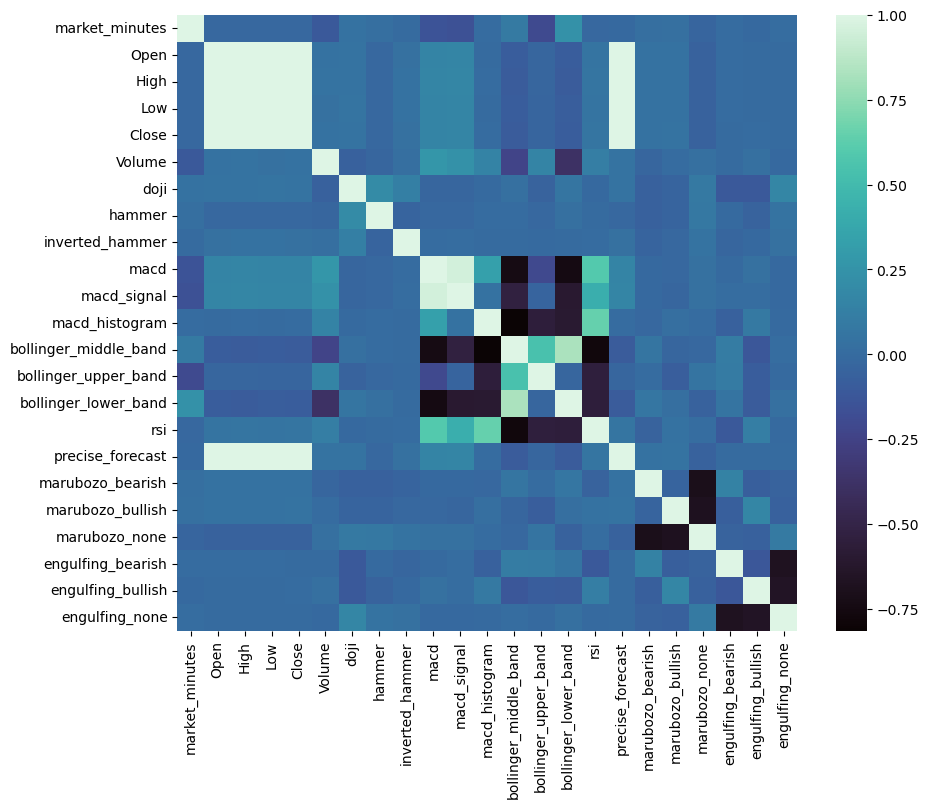

In [10]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="mako")

In [15]:
features = data.drop("precise_forecast", axis=1)
labels = np.reshape(data["precise_forecast"], (-1, 1))

features_scaler = StandardScaler()
features = features_scaler.fit_transform(features)
# label_scaler = StandardScaler()
# labels = label_scaler.fit_transform(labels)

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
features_train.shape, labels_train.shape

((8962, 22), (8962, 1))

In [16]:
tf.random.set_seed(seed=42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=features_train.shape[1]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1),
])

model1.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

epochs = int(data["precise_forecast"].max() / 10)
history1 = model1.fit(features_train, labels_train, epochs=epochs, validation_split=0.2)

Epoch 1/29
 12/225 [>.............................] - ETA: 1s - loss: 70475.9688 - mae: 265.2169 

2024-10-05 10:55:14.483339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 67055.0312 - mae: 258.1395

2024-10-05 10:55:15.798640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 2s 7ms/step - loss: 67055.0312 - mae: 258.1395 - val_loss: 61901.6719 - val_mae: 244.0841
Epoch 2/29
225/225 [==============================] - 2s 7ms/step - loss: 52909.8984 - mae: 220.9608 - val_loss: 43079.1797 - val_mae: 198.0849
Epoch 3/29
225/225 [==============================] - 1s 6ms/step - loss: 31309.2910 - mae: 165.7983 - val_loss: 20766.6602 - val_mae: 131.8406
Epoch 4/29
225/225 [==============================] - 1s 5ms/step - loss: 12423.8672 - mae: 97.5041 - val_loss: 5926.6475 - val_mae: 65.4324
Epoch 5/29
225/225 [==============================] - 1s 5ms/step - loss: 2879.2471 - mae: 41.5813 - val_loss: 1067.0160 - val_mae: 23.0188
Epoch 6/29
225/225 [==============================] - 1s 5ms/step - loss: 453.1889 - mae: 14.3486 - val_loss: 139.1416 - val_mae: 7.9398
Epoch 7/29
225/225 [==============================] - 1s 5ms/step - loss: 67.0661 - mae: 5.2792 - val_loss: 28.2039 - val_mae: 3.3284
Epoch 8/29
225/225 [=======

71/71 [==============================] - 0s 2ms/step
MAE = 0.8066306431237101
MSE = 1.3911621014287114
R^2 = 0.9902668594018469


2024-10-05 10:55:50.998823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'Predicted')

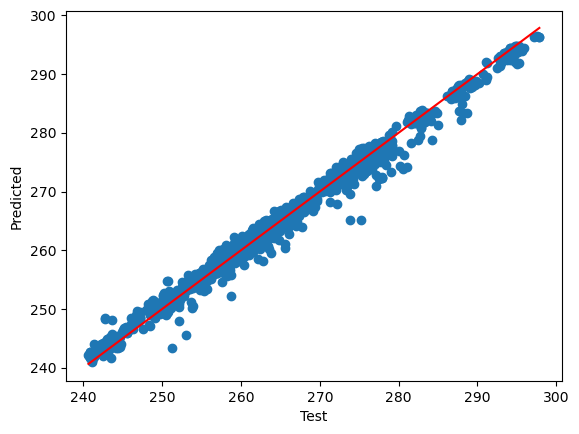

In [17]:
labels_pred = model1.predict(features_test)
mse = mean_squared_error(labels_test, labels_pred)
mae = mean_absolute_error(labels_test, labels_pred)
r2 = r2_score(labels_test, labels_pred)
print(f"MAE = {mae}")
print(f"MSE = {mse}")
print(f"R^2 = {r2}")

plt.scatter(labels_test, labels_pred)
plt.plot([labels_test.min(), labels_test.max()], [labels_test.min(), labels_test.max()], color="red")
plt.xlabel("Test")
plt.ylabel("Predicted")

In [14]:
model1.save("ZOMATO.NS-model")

INFO:tensorflow:Assets written to: ZOMATO.NS-model/assets


INFO:tensorflow:Assets written to: ZOMATO.NS-model/assets
